# _*Importation Donnée*_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("./fichiers/IMDb.csv")

df.head()

,Titre,Date parution,Genre,Durée,Pays,Langue,Réalisateur,Auteur,Producteur,Acteurs,Note,Votes,Note hommes,Votes hommes,Note femmes,Votes femmes,Note USA,Votes USA,Note hors USA,Votes hors USA
0,Miss Jerry,1894-10-09,Romance,45.0,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154.0,6.2,97.0,6.0,35.0,6.4,51.0,6.0,70.0
1,The Story of the Kelly Gang,1906-12-26,Biography,70.0,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589.0,6.1,425.0,6.2,50.0,6.0,96.0,6.2,331.0
2,Den sorte drøm,1911-08-19,Drama,53.0,Germany,NaN,Urban Gad,Urban Gad,Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188.0,5.9,146.0,5.7,15.0,6.2,31.0,5.9,123.0
3,Cleopatra,1912-11-13,Drama,100.0,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446.0,5.1,299.0,5.9,39.0,5.5,207.0,4.7,105.0
4,L'Inferno,1911-03-06,Adventure,68.0,Italy,Italian,Francesco Bertolini,Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,2237.0,7.0,1607.0,7.2,215.0,7.0,488.0,7.0,1166.0


# _*Analyse de la variable 'Note'*_

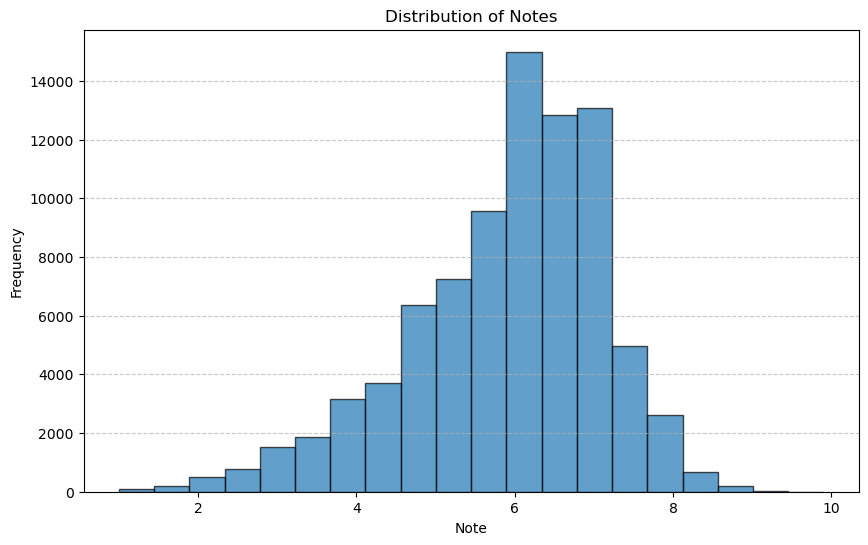

In [5]:

# Plot 1: Histogram for "Note"
plt.figure(figsize=(10, 6))
plt.hist(df['Note'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Notes')
plt.xlabel('Note')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



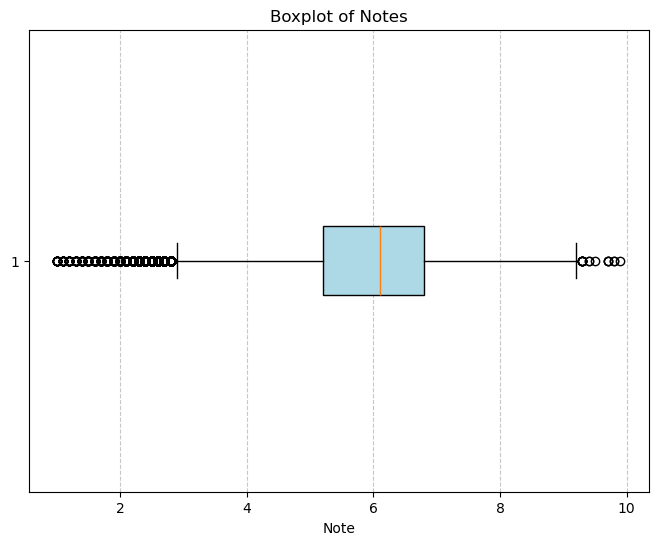

In [6]:

# Plot 2: Boxplot for "Note"
plt.figure(figsize=(8, 6))
plt.boxplot(df['Note'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot of Notes')
plt.xlabel('Note')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


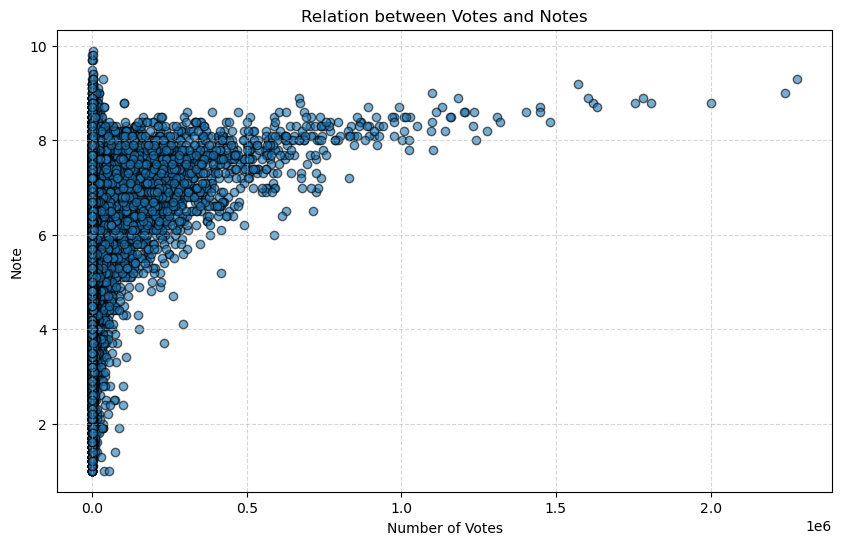

In [7]:

# Scatterplot: Relation between "Note" and "Votes"
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Note'], alpha=0.6, edgecolor='k')
plt.title('Relation between Votes and Notes')
plt.xlabel('Number of Votes')
plt.ylabel('Note')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

<Figure size 1200x600 with 0 Axes>

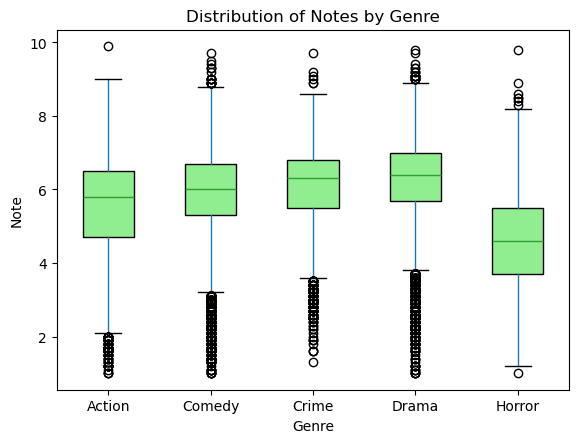

In [8]:
# Boxplot: Distribution of "Note" by "Genre" (Top 5 Genres by frequency)
top_genres = df['Genre'].value_counts().head(5).index
filtered_df = df[df['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
filtered_df.boxplot(column='Note', by='Genre', grid=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title('Distribution of Notes by Genre')
plt.suptitle('')  # Suppress default title
plt.xlabel('Genre')
plt.ylabel('Note')
plt.show()

# Interaction des variables avec Notes

In [10]:
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84429 entries, 0 to 84428
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titre           84429 non-null  object 
 1   Date parution   84429 non-null  object 
 2   Genre           83503 non-null  object 
 3   Durée           83725 non-null  float64
 4   Pays            84368 non-null  object 
 5   Langue          83525 non-null  object 
 6   Réalisateur     84346 non-null  object 
 7   Auteur          82901 non-null  object 
 8   Producteur      80057 non-null  object 
 9   Acteurs         84360 non-null  object 
 10  Note            84429 non-null  float64
 11  Votes           84429 non-null  float64
 12  Note hommes     84429 non-null  float64
 13  Votes hommes    84429 non-null  float64
 14  Note femmes     84429 non-null  float64
 15  Votes femmes    84429 non-null  float64
 16  Note USA        84429 non-null  float64
 17  Votes USA       84429 non-null 

Note Vs Genre

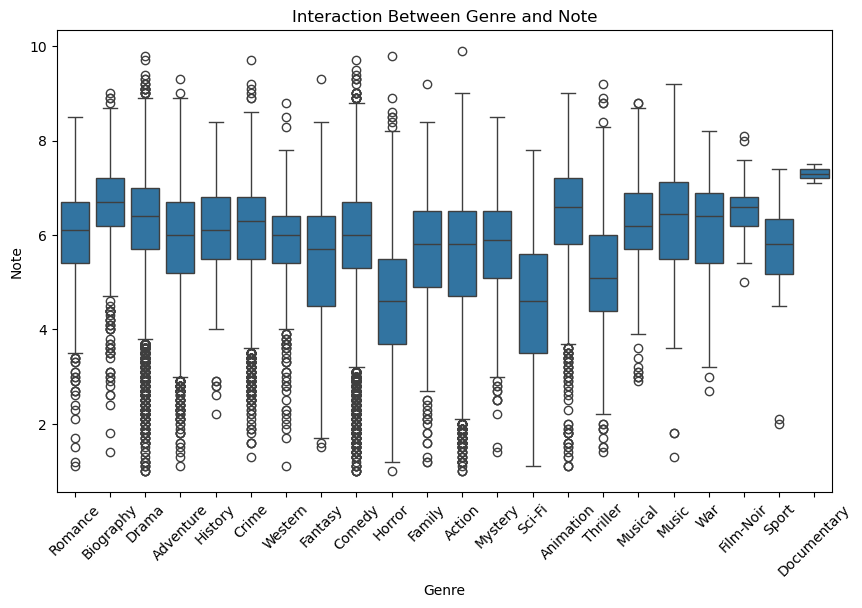

In [12]:
#Df Genre pour binaire
genre_df = pd.get_dummies(df[['Genre', 'Note']], columns=['Genre'], drop_first=True)

# Genre vs. Note
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='Note')
plt.title('Interaction Between Genre and Note')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Count unique Genre entries
genre_counts = df['Genre'].value_counts()  # Count occurrences of each genre
unique_genres = df['Genre'].nunique()  # Count the number of unique genres
print("Repetition counts for each Genre:")
print(genre_counts)
print(f"Number of unique genres: {unique_genres}")


Repetition counts for each Genre:
Genre
Drama          24615
Comedy         23596
Action         11864
Crime           5433
Horror          4997
Adventure       3516
Animation       2064
Biography       2029
Thriller        1333
Romance          741
Family           615
Western          604
Mystery          579
Fantasy          490
Sci-Fi           414
Musical          312
War              101
History           77
Music             76
Film-Noir         29
Sport             16
Documentary        2
Name: count, dtype: int64
Number of unique genres: 22


In [30]:
# Genre Analysis
genre_correlation = genre_df.corr()['Note'].drop('Note')  # Focus only on correlations with 'Note'
print("Genre Correlation with Note:")
print(genre_correlation)
print(f"Average correlation in Genre: {genre_correlation.mean()}")


Genre Correlation with Note:
Genre_Adventure     -0.005563
Genre_Animation      0.062516
Genre_Biography      0.094346
Genre_Comedy        -0.010184
Genre_Crime          0.043597
Genre_Documentary    0.005524
Genre_Drama          0.192095
Genre_Family        -0.020301
Genre_Fantasy       -0.032306
Genre_Film-Noir      0.010570
Genre_History        0.001649
Genre_Horror        -0.263206
Genre_Music          0.009890
Genre_Musical        0.015643
Genre_Mystery       -0.008639
Genre_Romance        0.004390
Genre_Sci-Fi        -0.076445
Genre_Sport         -0.004747
Genre_Thriller      -0.075351
Genre_War            0.005439
Genre_Western       -0.006705
Name: Note, dtype: float64
Average correlation in Genre: -0.0027517658418826


Note Vs Pays

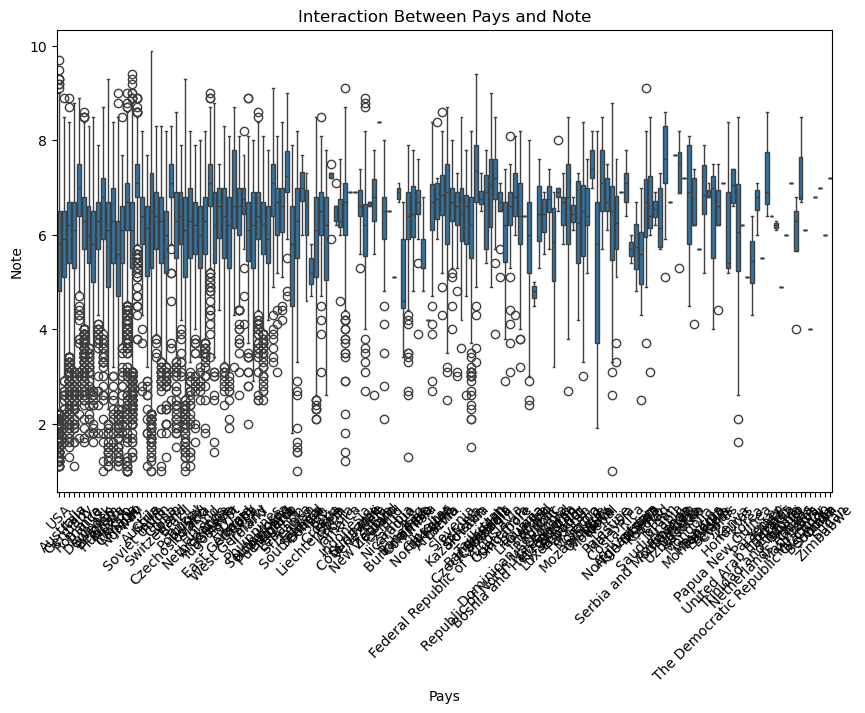

In [33]:
# Pays vs. Note
pays_df = pd.get_dummies(df[['Pays', 'Note']], columns=['Pays'], drop_first=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pays', y='Note')
plt.title('Interaction Between Pays and Note')
plt.xticks(rotation=45)
plt.show()

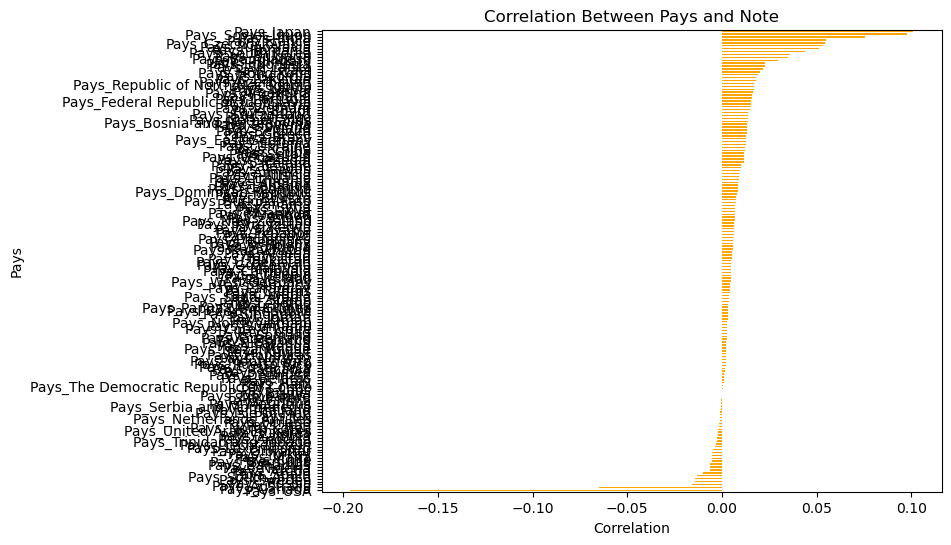

In [34]:
# Pays Correlation
pays_correlation = pays_df.corr()['Note'].drop('Note') 
plt.figure(figsize=(8, 6))
pays_correlation.sort_values().plot(kind='barh', color='orange')
plt.title('Correlation Between Pays and Note')
plt.xlabel('Correlation')
plt.ylabel('Pays')
plt.show()

In [36]:
# Count unique Pays entries
unique_pays = df['Pays'].nunique()
print(f"Number of unique countries (Pays): {unique_pays}")
pays_counts = df['Pays'].value_counts()
print("Repetition counts for each Pays:")
print(pays_counts)

Number of unique countries (Pays): 160
Repetition counts for each Pays:
Pays
USA              30572
India             6035
UK                5825
France            5098
Italy             3695
                 ...  
Zambia               1
Côte d'Ivoire        1
Gibraltar            1
Guinea               1
Sudan                1
Name: count, Length: 160, dtype: int64


In [39]:
# Pays Analysis
pays_correlation = pays_df.corr()['Note'].drop('Note')  # Focus only on correlations with 'Note'
print("Pays Correlation with Note:")
print(pays_correlation)
print(f"Average correlation in Pays: {pays_correlation.mean()}")

Pays Correlation with Note:
Pays_Albania         0.008577
Pays_Algeria         0.005376
Pays_Andorra        -0.002791
Pays_Angola          0.004117
Pays_Argentina       0.016202
                       ...   
Pays_West Germany    0.004535
Pays_Yemen           0.006766
Pays_Yugoslavia      0.053384
Pays_Zambia         -0.002233
Pays_Zimbabwe        0.000278
Name: Note, Length: 159, dtype: float64
Average correlation in Pays: 0.007143276588665467


Langue vs Note

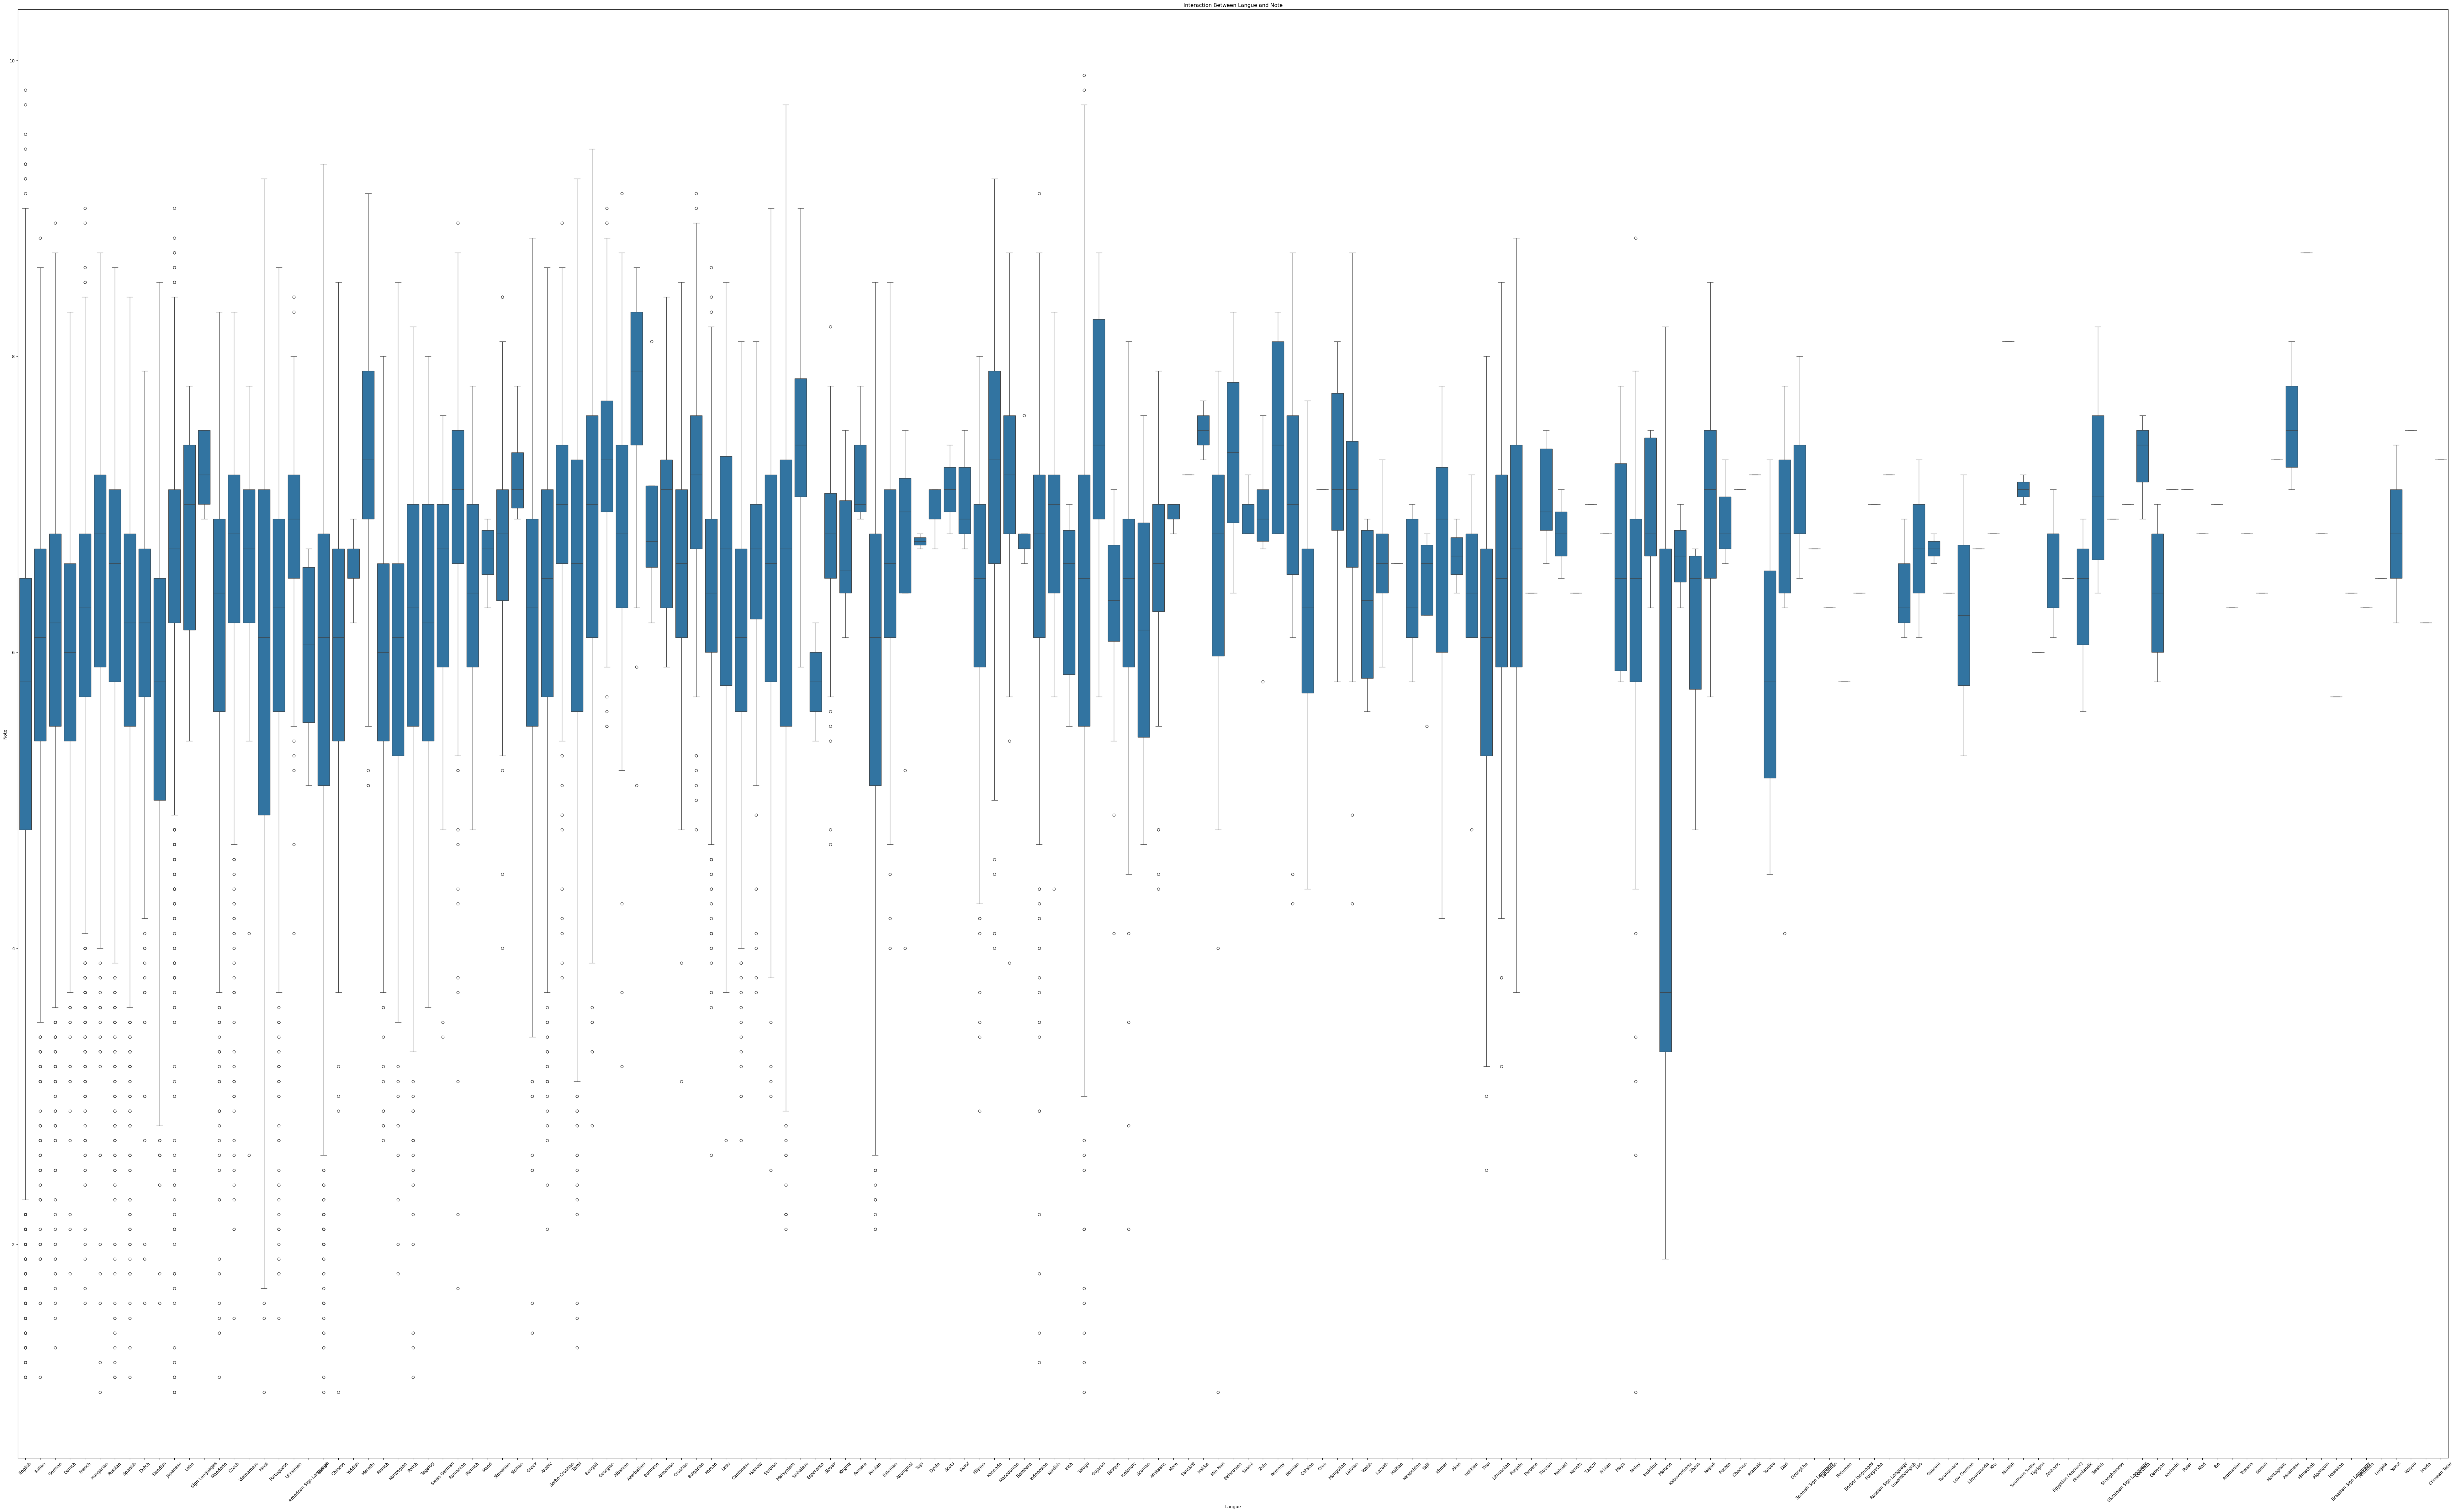

In [42]:
#langue vs note
langue_df = pd.get_dummies(df[['Langue', 'Note']], columns=['Langue'], drop_first=True)

plt.figure(figsize=(100, 60))
sns.boxplot(data=df, x='Langue', y='Note')
plt.title('Interaction Between Langue and Note')
plt.xticks(rotation=45)
plt.show()

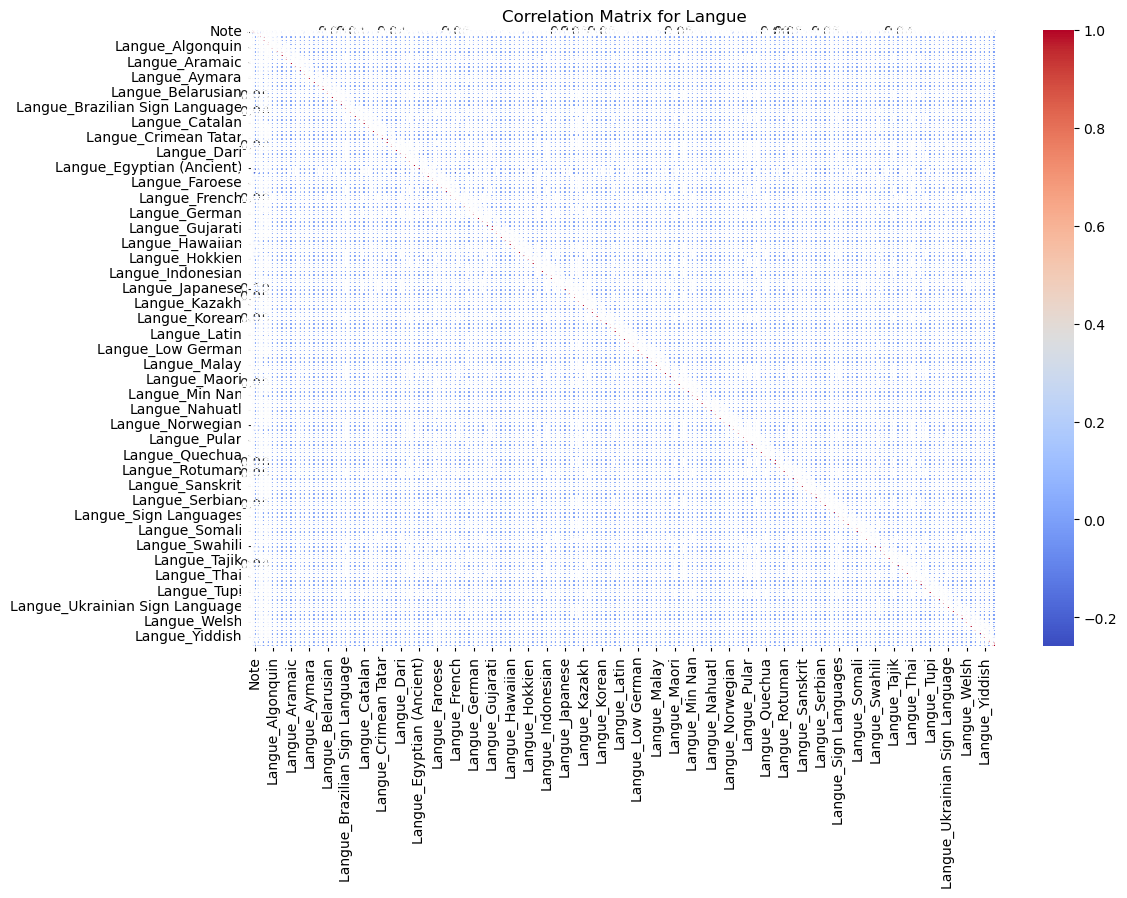

In [44]:
langue_correlation = langue_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(langue_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Langue')
plt.show()

In [45]:
# Count unique Langue entries
unique_langues = df['Langue'].nunique()
print(f"Number of unique languages: {unique_langues}")

# Count repetitions of each Langue
langue_counts = df['Langue'].value_counts()
print("Repetition counts for each Langue:")
print(langue_counts)


Number of unique languages: 163
Repetition counts for each Langue:
Langue
English          42303
French            5232
Spanish           3345
Italian           3209
Japanese          3114
                 ...  
Tigrigna             1
Haitian              1
Cree                 1
Chechen              1
Crimean Tatar        1
Name: count, Length: 163, dtype: int64


In [46]:
# Langue Analysis
langue_correlation = langue_df.corr()['Note'].drop('Note')  # Focus only on correlations with 'Note'
print("Langue Correlation with Note:")
print(langue_correlation)
print(f"Average correlation in Langue: {langue_correlation.mean()}")

Langue Correlation with Note:
Langue_Afrikaans                 0.011526
Langue_Akan                      0.002959
Langue_Albanian                  0.014992
Langue_Algonquin                 0.002511
Langue_American Sign Language    0.000682
                                   ...   
Langue_Xhosa                     0.001581
Langue_Yakut                     0.003551
Langue_Yiddish                   0.004117
Langue_Yoruba                   -0.000162
Langue_Zulu                      0.007066
Name: Note, Length: 162, dtype: float64
Average correlation in Langue: 0.00983400913735446


Correlation entre les variables

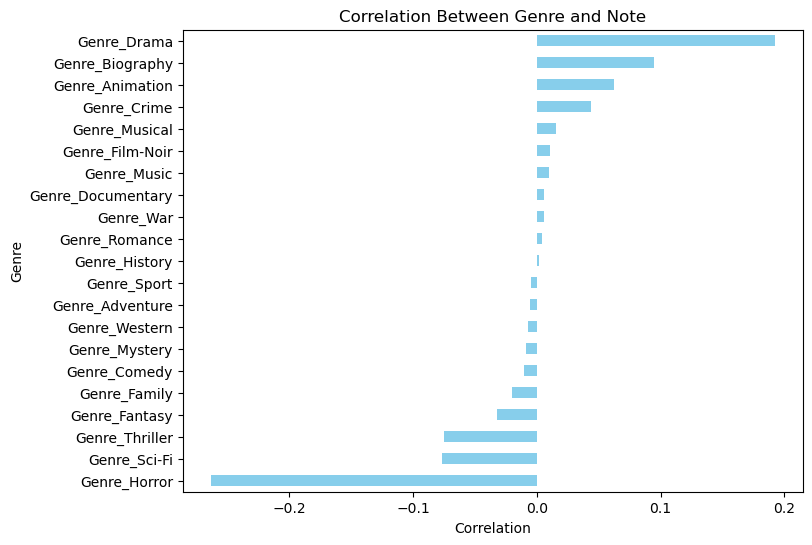

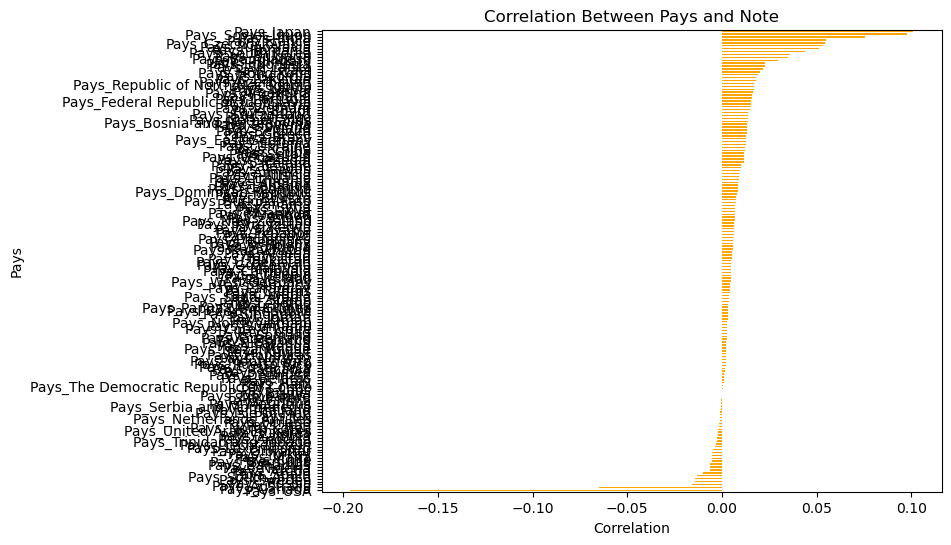

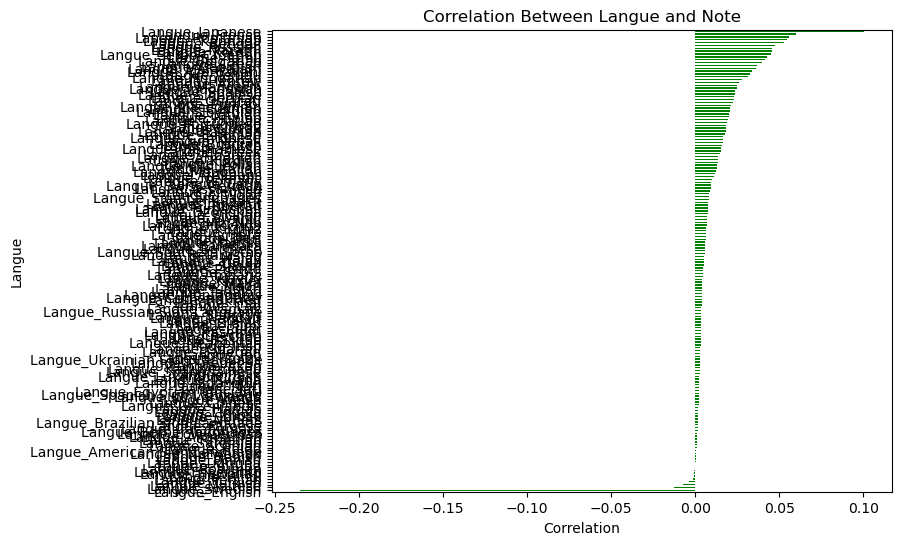

In [51]:

# Genre Correlation
genre_correlation = genre_df.corr()['Note'].drop('Note')  # Focus only on correlations with 'Note'
plt.figure(figsize=(8, 6))
genre_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation Between Genre and Note')
plt.xlabel('Correlation')
plt.ylabel('Genre')
plt.show()

# Pays Correlation
pays_correlation = pays_df.corr()['Note'].drop('Note')  # Focus only on correlations with 'Note'
plt.figure(figsize=(8, 6))
pays_correlation.sort_values().plot(kind='barh', color='orange')
plt.title('Correlation Between Pays and Note')
plt.xlabel('Correlation')
plt.ylabel('Pays')
plt.show()

# Langue Correlation
langue_correlation = langue_df.corr()['Note'].drop('Note')  # Focus only on correlations with 'Note'
plt.figure(figsize=(8, 6))
langue_correlation.sort_values().plot(kind='barh', color='green')
plt.title('Correlation Between Langue and Note')
plt.xlabel('Correlation')
plt.ylabel('Langue')
plt.show()


# Genre Model 1 2 et 3

In [54]:
df_drop_nan = df.dropna(subset=['Genre', 'Note']).copy()
df_drop_nan['Genre'] = pd.factorize(df_drop_nan['Genre'])[0]


In [55]:
# DataFrame 2: Use RobustScaler to fill NaN
robust_imputer = SimpleImputer(strategy='mean')
df_robust_scaled = df.copy()
df_robust_scaled[['Note']] = robust_imputer.fit_transform(df_robust_scaled[['Note']])
df_robust_scaled['Genre'] = pd.factorize(df_robust_scaled['Genre'])[0]
robust_scaler = RobustScaler()
df_robust_scaled[['Note']] = robust_scaler.fit_transform(df_robust_scaled[['Note']])

In [56]:
# DataFrame 3: Use StandardScaler to fill NaN
standard_imputer = SimpleImputer(strategy='mean')
df_standard_scaled = df.copy()
df_standard_scaled[['Note']] = standard_imputer.fit_transform(df_standard_scaled[['Note']])
df_standard_scaled['Genre'] = pd.factorize(df_standard_scaled['Genre'])[0]
standard_scaler = StandardScaler()
df_standard_scaled[['Note']] = standard_scaler.fit_transform(df_standard_scaled[['Note']])

In [57]:
# Helper function to prepare data and train a RandomForest model
def train_model(data):
    X = data[['Genre']]
    y = data['Note']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [58]:
# Model 1: Drop NaN
mse_drop_nan, r2_drop_nan = train_model(df_drop_nan)
print(f"Model 1 (Drop NaN) - MSE: {mse_drop_nan:.4f}, R2: {r2_drop_nan:.4f}")


Model 1 (Drop NaN) - MSE: 1.3223, R2: 0.1332


In [59]:
# Model 2: RobustScaler
mse_robust_scaled, r2_robust_scaled = train_model(df_robust_scaled)
print(f"Model 2 (RobustScaler) - MSE: {mse_robust_scaled:.4f}, R2: {r2_robust_scaled:.4f}")

Model 2 (RobustScaler) - MSE: 0.5099, R2: 0.1280


In [60]:
# Model 3: StandardScaler
mse_standard_scaled, r2_standard_scaled = train_model(df_standard_scaled)
print(f"Model 3 (StandardScaler) - MSE: {mse_standard_scaled:.4f}, R2: {r2_standard_scaled:.4f}")


Model 3 (StandardScaler) - MSE: 0.8583, R2: 0.1280


In [61]:
# Step 6: Compare Models
models = ['Drop NaN', 'RobustScaler', 'StandardScaler']
mse_values = [mse_drop_nan, mse_robust_scaled, mse_standard_scaled]
r2_values = [r2_drop_nan, r2_robust_scaled, r2_standard_scaled]

In [62]:
# Step 6: Compare Models
models = ['Model 1', 'Model 2', 'Model 3']
mse_values = [mse_drop_nan, mse_robust_scaled, mse_standard_scaled]
r2_values = [r2_drop_nan, r2_robust_scaled, r2_standard_scaled]

print("\nModel Comparison:")
for i, model in enumerate(models):
    print(f"{model}: MSE = {mse_values[i]:.4f}, R2 = {r2_values[i]:.4f}")


Model Comparison:
Model 1: MSE = 1.3223, R2 = 0.1332
Model 2: MSE = 0.5099, R2 = 0.1280
Model 3: MSE = 0.8583, R2 = 0.1280


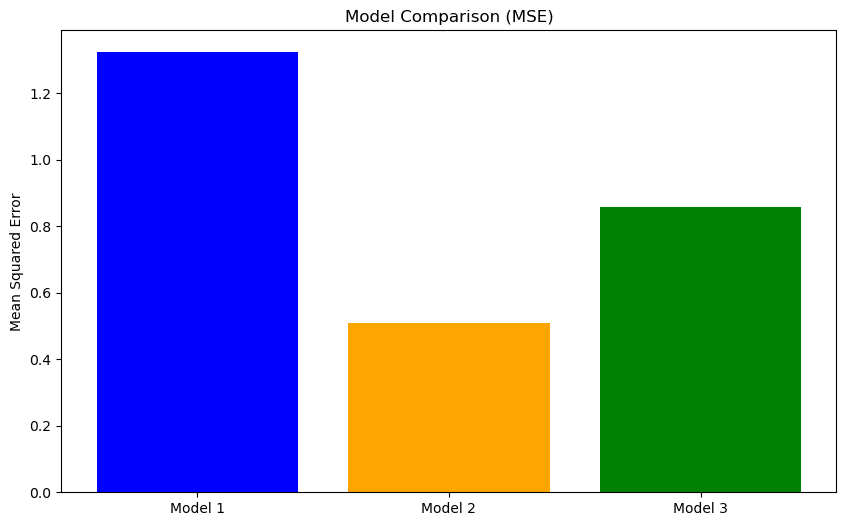

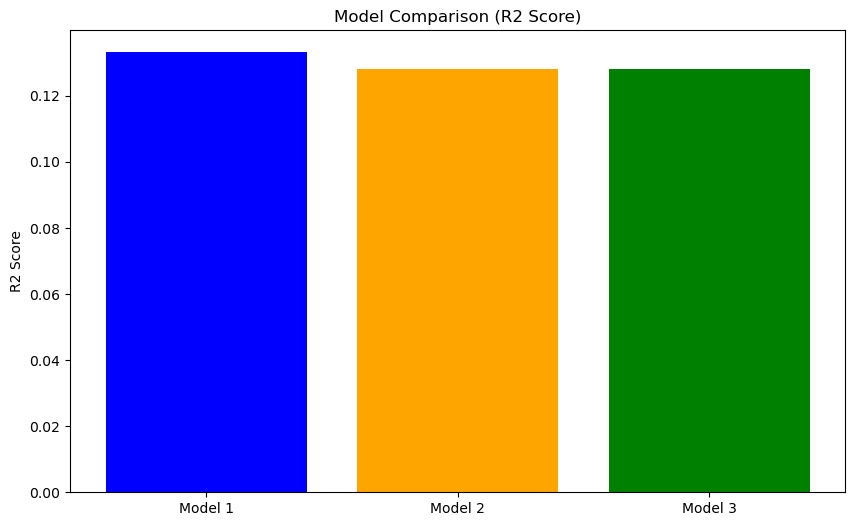

In [63]:
# Visualize Model Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.title('Model Comparison (MSE)')
plt.ylabel('Mean Squared Error')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green'])
plt.title('Model Comparison (R2 Score)')
plt.ylabel('R2 Score')
plt.show()